# LAB | Feature Engineering

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [14]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [15]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


**Check the shape of your data**

In [16]:
spaceship.shape

(8693, 14)

**Check for data types**

In [17]:
spaceship.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

**Check for missing values**

In [18]:
spaceship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value. 

In [19]:
spaceship = spaceship.dropna().reset_index()

- **Cabin** is too granular - transform it in order to obtain {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}

In [20]:
list(spaceship['Cabin'].unique())

['B/0/P',
 'F/0/S',
 'A/0/S',
 'F/1/S',
 'F/0/P',
 'F/2/S',
 'F/3/S',
 'B/1/P',
 'F/1/P',
 'G/1/S',
 'F/2/P',
 'F/4/P',
 'F/5/P',
 'G/0/P',
 'F/6/P',
 'E/0/S',
 'F/6/S',
 'C/0/P',
 'F/8/P',
 'G/4/S',
 'F/9/P',
 'D/1/S',
 'D/1/P',
 'F/10/S',
 'G/2/P',
 'B/3/P',
 'G/3/P',
 'F/10/P',
 'E/2/S',
 'F/11/S',
 'A/1/S',
 'G/7/S',
 'F/12/S',
 'F/13/S',
 'G/6/P',
 'G/10/S',
 'F/15/S',
 'F/13/P',
 'F/14/P',
 'F/17/S',
 'D/3/P',
 'C/3/S',
 'F/18/S',
 'F/15/P',
 'C/4/S',
 'G/13/S',
 'F/16/P',
 'G/14/S',
 'C/5/S',
 'F/17/P',
 'E/5/S',
 'G/15/S',
 'F/20/S',
 'G/9/P',
 'A/2/S',
 'G/11/P',
 'F/19/P',
 'F/23/S',
 'G/18/S',
 'D/2/S',
 'G/19/S',
 'B/5/P',
 'E/6/S',
 'B/1/S',
 'F/23/P',
 'G/20/S',
 'D/4/P',
 'A/0/P',
 'G/21/S',
 'F/27/P',
 'F/27/S',
 'E/7/S',
 'D/3/S',
 'E/8/S',
 'F/29/S',
 'D/5/S',
 'G/17/P',
 'G/18/P',
 'C/6/S',
 'G/19/P',
 'F/29/P',
 'F/31/S',
 'G/25/S',
 'G/26/S',
 'F/31/P',
 'G/20/P',
 'G/22/P',
 'B/8/P',
 'G/28/S',
 'F/35/S',
 'G/23/P',
 'E/10/S',
 'G/30/S',
 'G/24/P',
 'F/38/P',
 'B/

In [21]:
for i in range(0, len(spaceship)):
    spaceship.iloc[i, 4] = spaceship['Cabin'][i][0]

In [22]:
spaceship

,index,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0,0001_01,Europa,False,B,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,1,0002_01,Earth,False,F,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,2,0003_01,Europa,False,A,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,3,0003_02,Europa,False,A,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,4,0004_01,Earth,False,F,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6601,8688,9276_01,Europa,False,A,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
6602,8689,9278_01,Earth,True,G,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
6603,8690,9279_01,Earth,False,G,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
6604,8691,9280_01,Europa,False,E,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [23]:
spaceship['Cabin']

0       B
1       F
2       A
3       A
4       F
       ..
6601    A
6602    G
6603    G
6604    E
6605    E
Name: Cabin, Length: 6606, dtype: object

- Drop PassengerId and Name

In [24]:
spaceship.drop(['PassengerId', 'Name'], axis=1, inplace=True)

In [25]:
spaceship

,index,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0,Europa,False,B,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,1,Earth,False,F,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,2,Europa,False,A,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,3,Europa,False,A,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,4,Earth,False,F,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6601,8688,Europa,False,A,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
6602,8689,Earth,True,G,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
6603,8690,Earth,False,G,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
6604,8691,Europa,False,E,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


- For non-numerical columns, do dummies.

In [30]:
columnas_no_numericas = spaceship.select_dtypes(exclude=['number']).columns

In [31]:
spaceship_con_dummies = pd.get_dummies(spaceship, columns=columnas_no_numericas)

In [32]:
spaceship_con_dummies

,index,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth_False,HomePlanet_Earth_True,HomePlanet_Europa_False,...,Destination_TRAPPIST-1e_False,Destination_TRAPPIST-1e_True,VIP_False_False,VIP_False_True,VIP_True_False,VIP_True_True,Transported_False_False,Transported_False_True,Transported_True_False,Transported_True_True
0,0,39.0,0.0,0.0,0.0,0.0,0.0,True,False,False,...,False,True,False,True,True,False,False,True,True,False
1,1,24.0,109.0,9.0,25.0,549.0,44.0,False,True,True,...,False,True,False,True,True,False,True,False,False,True
2,2,58.0,43.0,3576.0,0.0,6715.0,49.0,True,False,False,...,False,True,True,False,False,True,False,True,True,False
3,3,33.0,0.0,1283.0,371.0,3329.0,193.0,True,False,False,...,False,True,False,True,True,False,False,True,True,False
4,4,16.0,303.0,70.0,151.0,565.0,2.0,False,True,True,...,False,True,False,True,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6601,8688,41.0,0.0,6819.0,0.0,1643.0,74.0,True,False,False,...,True,False,True,False,False,True,False,True,True,False
6602,8689,18.0,0.0,0.0,0.0,0.0,0.0,False,True,True,...,True,False,False,True,True,False,False,True,True,False
6603,8690,26.0,0.0,0.0,1872.0,1.0,0.0,False,True,True,...,False,True,False,True,True,False,True,False,False,True
6604,8691,32.0,0.0,1049.0,0.0,353.0,3235.0,True,False,False,...,True,False,False,True,True,False,False,True,True,False


**Perform Train Test Split**

In [33]:
features = spaceship_con_dummies

In [34]:
target = spaceship['RoomService']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

**Model Selection**

In this exercise we will be using **KNN** as our predictive model.

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [46]:
normalizer = MinMaxScaler()

In [47]:
normalizer.fit(X_train)

MinMaxScaler()

In [48]:
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [49]:
knn = KNeighborsRegressor(n_neighbors=10)

In [50]:
knn.fit(X_train_norm, y_train)

KNeighborsRegressor(n_neighbors=10)

In [51]:
knn.score(X_test_norm, y_test)

0.43626657572521654

In [52]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

,index,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth_False,HomePlanet_Earth_True,HomePlanet_Europa_False,...,Destination_TRAPPIST-1e_False,Destination_TRAPPIST-1e_True,VIP_False_False,VIP_False_True,VIP_True_False,VIP_True_True,Transported_False_False,Transported_False_True,Transported_True_False,Transported_True_True
0,0.394937,0.405063,0.00000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.841427,0.050633,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.234983,0.379747,0.00000,0.007916,0.000000,0.051276,0.000000,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.575259,0.215190,0.00131,0.000000,0.046111,0.016378,0.000049,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.662255,0.329114,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


In [53]:
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_test_norm.head()

,index,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth_False,HomePlanet_Earth_True,HomePlanet_Europa_False,...,Destination_TRAPPIST-1e_False,Destination_TRAPPIST-1e_True,VIP_False_False,VIP_False_True,VIP_True_False,VIP_True_True,Transported_False_False,Transported_False_True,Transported_True_False,Transported_True_True
0,0.282278,0.632911,0.0,0.000000,0.0,0.00000,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.153510,0.227848,0.0,0.000000,0.0,0.00000,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.951899,0.189873,0.0,0.000000,0.0,0.00000,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.585731,0.658228,0.0,0.000000,0.0,0.00000,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.501381,0.784810,0.0,0.054775,0.0,0.07774,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


- Evaluate your model's performance. Comment it

In [56]:

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

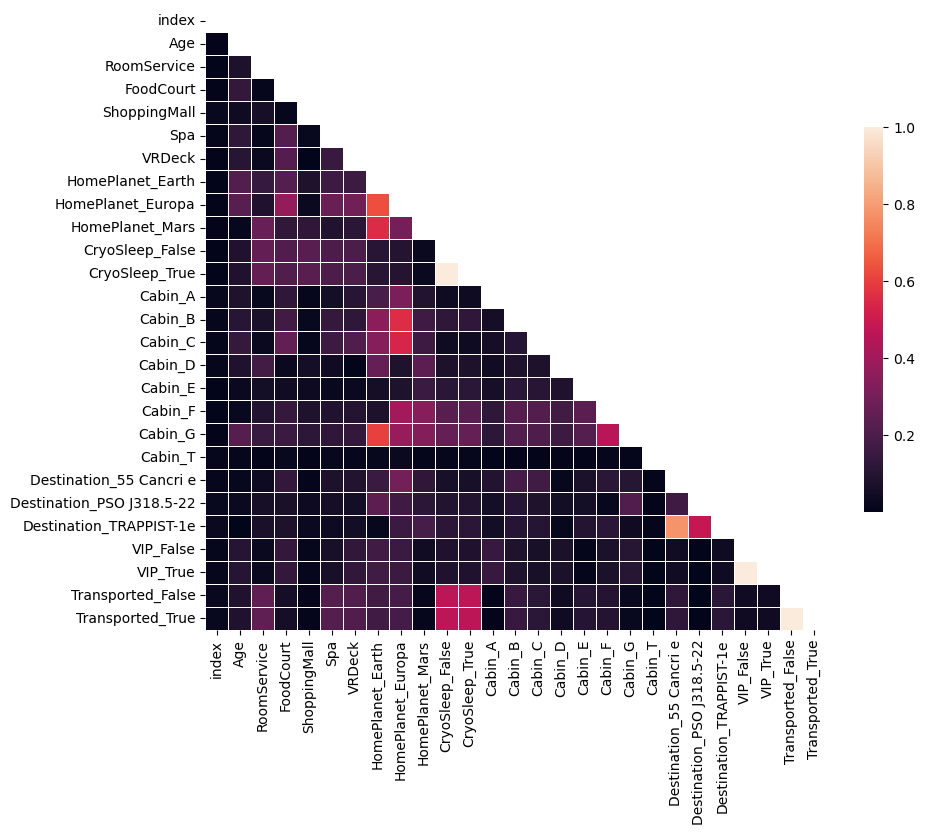

In [58]:
corr=np.abs(spaceship.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()